In [2]:
import pandas as pd

from termcolor import colored

# Datos

### El objetivo de esta practica es:<br>

**El presente conjunto de datos es de individuos que presentan diabetes**<br>
No tengo con certeza que significa algunas variables
- preg
- plas
- pres
- skin (Piel)
- test (Prueba)
- mass 
- pedi
- age (edad)
- class (Variable objetivo 1: tiene diabetes, 0: No tiene diabetes)



In [3]:
url = 'https://raw.githubusercontent.com/MausamGaurav/AutomatedFeatureSelection/master/diabetes.csv'
col = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pd.read_csv(url, names = col)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Eliminar funciones con baja varianza (Preprocesamiento)

In [4]:
X = data.drop('class',axis = 1)
y = data['class']

In [5]:
from sklearn.feature_selection import VarianceThreshold

In [6]:
print(colored('Ahora creamos un objeto VarianceThreshold de Sklearn, con un umbral de varianza de 0.3 (es decir, eliminamos entidades con una varianza inferior al 30%). A continuación, ajustamos el objeto VarianceThreshold con la variable de respuesta X y la matriz de características Y.' ,attrs=['bold']))

Ahora creamos un objeto VarianceThreshold de Sklearn, con un umbral de varianza de 0.3 (es decir, eliminamos entidades con una varianza inferior al 30%). A continuación, ajustamos el objeto VarianceThreshold con la variable de respuesta X y la matriz de características Y.


In [7]:
estimador = VarianceThreshold(threshold = 0.3)
estimador = estimador.fit(X,y)

In [8]:
cols = estimador.get_support(indices = True)
cols

array([0, 1, 2, 3, 4, 5, 7], dtype=int64)

In [9]:
print(colored('La variable "pedi" se ha eliminado de la matriz de funciones.' ,attrs=['bold']))
X.columns[cols]

Si miramos ahora los nombres de las funciones, vemos que la función "pedi" se ha eliminado de la matriz de funciones.


Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'age'], dtype='object')

### Eliminar características que no estén correlacionadas con la variable de respuesta

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

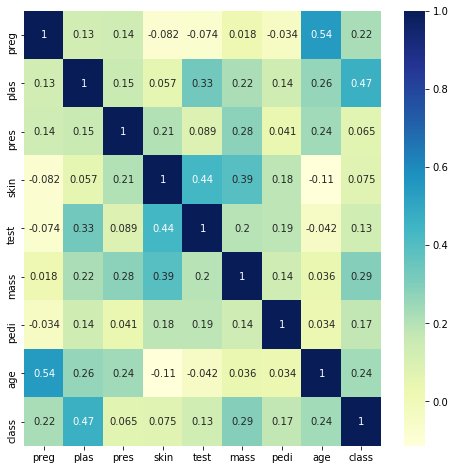

In [72]:
plt.figure(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [84]:
print(colored('seleccionar solo aquellas características que tienen un coeficiente de correlación por encima de un umbral (al igual que el umbral de varianza). En nuestro caso utilizamos un umbral del 10%' ,attrs=['bold']))
print(colored('Variables que no cumplen: press, skin', color = "red",attrs=['bold']))


seleccionar solo aquellas características que tienen un coeficiente de correlación por encima de un umbral (al igual que el umbral de varianza). En nuestro caso utilizamos un umbral del 10%
Variables que no cumplen: press, skin


<font color = "red">Nota</font>
- Como aseguro que las variables eliminadas son independientes al resto

In [75]:
corr_var = abs(corr['class'])
caracteristicas = corr_var[corr_var>0.1]
caracteristicas

preg     0.221898
plas     0.466581
test     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

### K-Mejor Ajuste

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [79]:
KBest = SelectKBest(score_func = chi2, k=5)
KBest = KBest.fit(X,y)

In [82]:
df_scores = pd.DataFrame({'feature': X.columns, 'Chi2Score':KBest.scores_,'pValue':KBest.pvalues_})
df_scores

,feature,Chi2Score,pValue
0,preg,111.519691,4.552610e-26
1,plas,1411.887041,5.487286e-309
2,pres,17.605373,2.718193e-05
3,skin,53.108040,3.156977e-13
4,test,2175.565273,0.000000e+00
5,mass,127.669343,1.325908e-29
6,pedi,5.392682,2.022137e-02
7,age,181.303689,2.516388e-41


In [95]:
cols = KBest.get_support(indices = True)
cols

array([0, 1, 4, 5, 7], dtype=int64)

In [101]:
X.columns[cols]

Index(['preg', 'plas', 'test', 'mass', 'age'], dtype='object')

# Referencias

- https://datagraphi.com/blog/post/2019/9/23/feature-selection-with-sklearn-in-python
- **Mausam Gaurav**